In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv('/content/drive/MyDrive/ML Lab test/Datasets/HR_comma_sep.csv')

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
le=LabelEncoder()

In [9]:
data['encodesal']=le.fit_transform(data['salary'])
data['encodesales']=le.fit_transform(data['sales'])

In [10]:
X=data.drop(labels=['salary','sales','left'],axis=1)

In [11]:
y=data['left']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
mlp=MLPClassifier(hidden_layer_sizes=(6,5),random_state=5,learning_rate_init=0.01)

In [25]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5)

In [26]:
predictions=mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


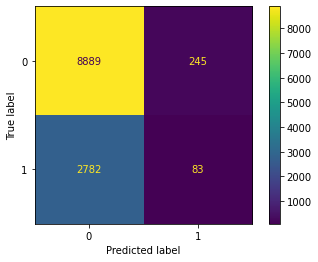

In [27]:
plot_confusion_matrix(mlp,X_train,y_train)

In [28]:
confusion_matrix(y_test,predictions)

array([[2224,   70],
       [ 692,   14]])